In [100]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
from scipy import stats

#https://www.kaggle.com/datasets/kapturovalexander/ign-games-from-best-to-worst
gamesDF = pd.read_csv('games_ratings.csv')
gamesDF.head(10)

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25
5,Grand Theft Auto IV (Special Edition),10.0,Masterpiece,Xbox 360,Action,2008,4,29
6,Grand Theft Auto IV (Special Edition),10.0,Masterpiece,PlayStation 3,Action,2008,4,29
7,Grand Theft Auto V,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2013,9,16
8,Grand Theft Auto V,10.0,Masterpiece,Xbox 360,"Action, Adventure",2013,9,16
9,Grand Theft Auto V,10.0,Masterpiece,PlayStation 4,"Action, Adventure",2014,11,17


In [46]:
gamesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          18625 non-null  object 
 1   score          18625 non-null  float64
 2   score_phrase   18625 non-null  object 
 3   platform       18625 non-null  object 
 4   genre          18589 non-null  object 
 5   release_year   18625 non-null  int64  
 6   release_month  18625 non-null  int64  
 7   release_day    18625 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB


In [37]:
#title, score_phrase, platform, genre - nominal
#score, release_year, release_month, release_day - ordinal 

In [48]:
gamesDF['score'].describe()

count    18625.000000
mean         6.950459
std          1.711736
min          0.500000
25%          6.000000
50%          7.300000
75%          8.200000
max         10.000000
Name: score, dtype: float64

In [50]:
gamesDF['score'].median()

7.3

In [54]:
testingDF = gamesDF
framesToChange = gamesDF['score_phrase']
framesToChange

0        Masterpiece
1        Masterpiece
2        Masterpiece
3        Masterpiece
4        Masterpiece
            ...     
18620     Unbearable
18621     Unbearable
18622       Disaster
18623       Disaster
18624       Disaster
Name: score_phrase, Length: 18625, dtype: object

In [56]:
counts = framesToChange.value_counts()
counts

score_phrase
Great          4773
Good           4741
Okay           2945
Mediocre       1959
Amazing        1804
Bad            1269
Awful           664
Painful         340
Unbearable       72
Masterpiece      55
Disaster          3
Name: count, dtype: int64

In [105]:
phrasesDict = {}
ind = 0
for frame in testingDF['score_phrase']:
    if frame not in phrasesDict:
        ind+=1
        phrasesDict[frame] = ind

testingDF = testingDF.replace(phrasesDict.keys(), phrasesDict.values())
testingDF.tail(20)

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
18605,Kidz Sports: Basketball,1.0,10,Wii,Sports,2008,2,27
18606,Kidz Sports: Ice Hockey,1.0,10,Wii,Sports,2008,2,26
18607,Kidz Sports: International Soccer,1.0,10,Wii,Sports,2008,2,29
18608,London Taxi: Rush Hour,1.0,10,Wii,Racing,2008,2,29
18609,Mega Man 2,1.0,10,iPhone,Action,2009,3,27
18610,Monster Trux Arenas -- Special Edition,1.0,10,Wii,Racing,2008,2,6
18611,Motocross Championship,1.0,10,Sega 32X,Racing,2008,11,20
18612,NFL Blitz 20-03,1.0,10,Game Boy Advance,"Sports, Action",2002,8,13
18613,NRA Varmint Hunter,1.0,10,PC,Shooter,2005,1,28
18614,Offroad Extreme -- Special Edition,1.0,10,Wii,Racing,2007,12,10


In [58]:
#mean - среднее арифметическое
#median - среднее значение
#std - стандартное откловение
testingDF['score_phrase'].describe()

count     18625
unique       11
top       Great
freq       4773
Name: score_phrase, dtype: object

In [60]:
#testingDF['platform'].describe()
testingDF['platform'].value_counts()

platform
PC                      3370
PlayStation 2           1686
Xbox 360                1631
Wii                     1366
PlayStation 3           1356
Nintendo DS             1045
PlayStation              952
Wireless                 910
iPhone                   842
Xbox                     821
PlayStation Portable     633
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             254
Nintendo 3DS             225
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 

In [62]:
testingDF.corr(numeric_only=True)

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


In [64]:
'''genreToScoreDF = testingDF.groupby('genre').count().reset_index()
genreToScoreDF.rename(columns={'score_phrase': 'amount'}, inplace=True)
genreToScoreDF = genreToScoreDF[['genre','amount']]
genreToScoreDF'''
genreGroups = testingDF.groupby(['genre'])
genreGroups['score'].mean()

genre
Action                   6.626679
Action, Adventure        7.371895
Action, Compilation      7.029213
Action, Editor           7.500000
Action, Platformer       6.066667
                           ...   
Strategy, Simulation     8.100000
Trivia                   6.205042
Virtual Pet              6.026829
Wrestling                7.058209
Wrestling, Simulation    7.000000
Name: score, Length: 112, dtype: float64

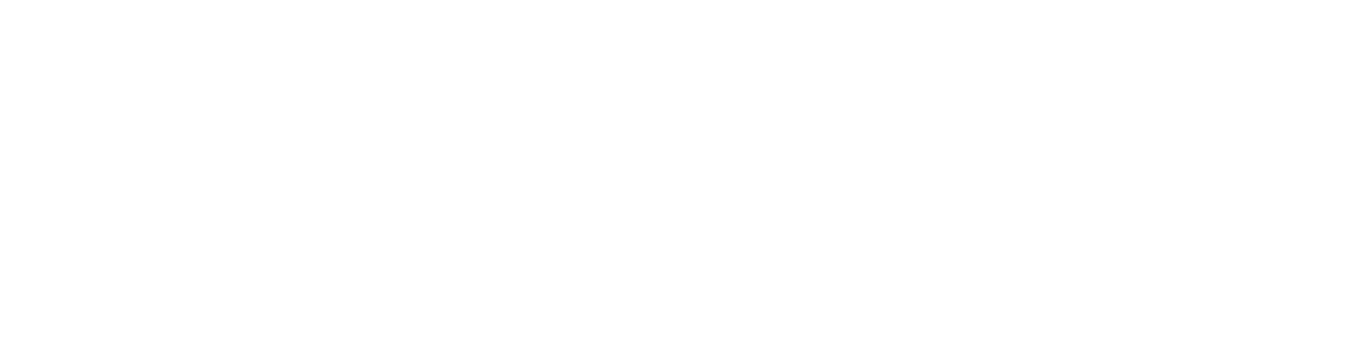

In [66]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
fig.add_trace(
    go.Pie(labels=gamesDF['score_phrase'], values=testingDF['score_phrase'], textinfo='label+percent'), 1, 1 
)
fig.show()

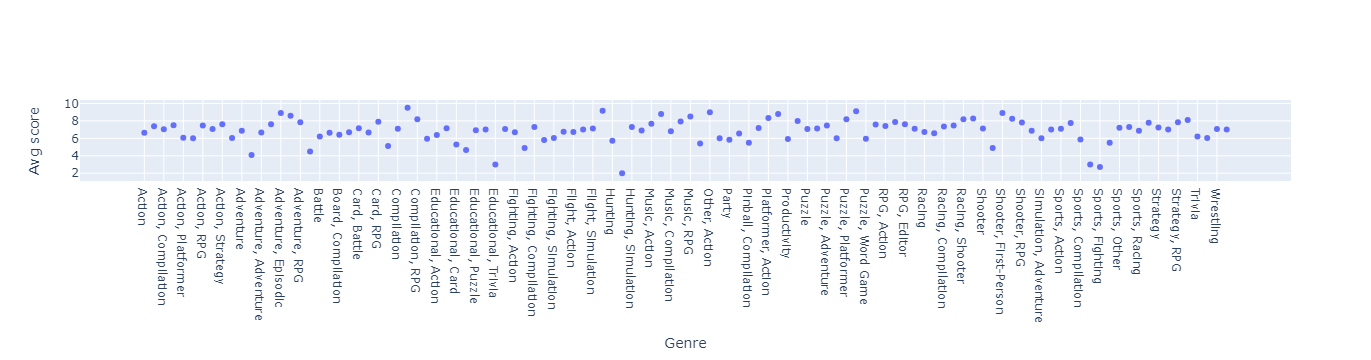

In [68]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'scatter'}]])
fig.add_trace(
    go.Scatter(x=genreGroups['score'].mean().index, y=genreGroups['score'].mean(), mode = 'markers'), 1, 1
)
fig.update_xaxes(title='Genre', row=1, col=1)
fig.update_yaxes(title='Avg score', row=1, col=1)
fig.show()

In [94]:
score_avg_2010 = gamesDF.query("release_year < 2010")[['score', 'title']]
score_avg_2010

,score,title
0,10.0,Checkered Flag
2,10.0,Dragon Warrior III
3,10.0,Grand Theft Auto IV
4,10.0,Grand Theft Auto IV
5,10.0,Grand Theft Auto IV (Special Edition)
...,...,...
18620,1.0,The Crow: City of Angels
18621,1.0,The Simpsons Wrestling
18622,0.8,Action Girlz Racing
18623,0.7,Extreme PaintBrawl


In [98]:
score_avg_2023 = gamesDF.query("release_year >= 2010")[['score', 'title']]
score_avg_2023

,score,title
1,10.0,Chrono Trigger
7,10.0,Grand Theft Auto V
8,10.0,Grand Theft Auto V
9,10.0,Grand Theft Auto V
10,10.0,Grand Theft Auto V
...,...,...
18577,1.5,Rudolph the Red-Nosed Reindeer
18578,1.5,Rugby World Cup 2015
18603,1.0,Hints Hunter
18618,1.0,Self-Defense Training Camp


In [102]:
stats.ttest_ind(score_avg_2010['score'], score_avg_2023['score'])

TtestResult(statistic=-14.242760440274706, pvalue=8.651505807751652e-46, df=18623.0)